In [ ]:
# Titanic Dataset Analysis Project
#
# This Jupyter Notebook performs the required analysis on the Titanic dataset as per the project brief. We will use Pandas for data manipulation, Matplotlib and Seaborn for visualizations, and Plotly for interactive plots where applicable.
#
#  Setup and Libraries
# First, install and import necessary libraries. In Google Colab, run the following cell.

# In Google Colab, upload the CSV file via the Files panel or use the code below if the file is already available.
# For this notebook, the file is named 'Titanic.csv' and uploaded.

# Installing required libraries
# !pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Set style for Seaborn
sns.set_style("whitegrid")

##  Data Import and Preparation

In [ ]:
# ## 1. Data Import and Preparation
#
# Import the Titanic dataset and perform preprocessing: handle missing values, convert data types.

# Load the dataset
df = pd.read_csv('Titanic.csv')  # Upload 'Titanic.csv' to Colab first

In [ ]:
# Display basic info
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (891, 12)

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0     

## print Dataset info

In [ ]:
print("\nDataset info:")
print(df.info())

#print columns with missing value
print("\nMissing values:")
print(df.isnull().sum())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          68

# Handle missing values


# Handle missing values (fixed to avoid FutureWarning)

In [ ]:
#Age: Fill with median age
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
# Embarked: Fill with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
# Cabin: Too many missing, drop for now or fill with 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [ ]:
# Fare: No missing, but ensure numeric
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Creating extra column

In [ ]:
# Create Family Size column for later analysis
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for self

In [ ]:
# Create Alone column
df['Alone'] = (df['FamilySize'] == 1).astype(int)

# Convert Categorical Variable


In [ ]:
# Convert categorical to appropriate types if needed
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

In [ ]:
print("\nAfter preprocessing - Missing values:")
print(df.isnull().sum())
print("\nDataset info after preprocessing:")
print(df.info())


After preprocessing - Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
Alone          0
dtype: int64

Dataset info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        891 non-null    object  
 11  Embark

# 2. Basic Analysis-Perform statistical analysis on numerical variables (Age, Fare) and visualize demographics.

In [ ]:
# 2. Basic Analysis
# Perform statistical analysis on numerical variables (Age, Fare) and visualize demographics.

# Basic statistics for numerical columns
print("Statistical summary for numerical variables:")
print(df[['Age', 'Fare', 'SibSp', 'Parch', 'FamilySize']].describe())

Statistical summary for numerical variables:
              Age        Fare       SibSp       Parch  FamilySize
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean    29.361582   32.204208    0.523008    0.381594    1.904602
std     13.019697   49.693429    1.102743    0.806057    1.613459
min      0.420000    0.000000    0.000000    0.000000    1.000000
25%     22.000000    7.910400    0.000000    0.000000    1.000000
50%     28.000000   14.454200    0.000000    0.000000    1.000000
75%     35.000000   31.000000    1.000000    0.000000    2.000000
max     80.000000  512.329200    8.000000    6.000000   11.000000


# Visualize passenger demographics

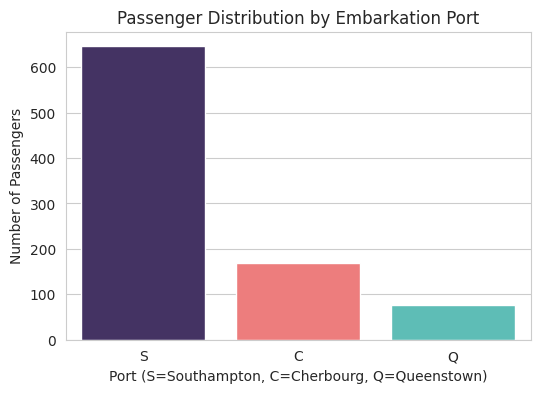

In [ ]:
# Embarked distribution (Port of Embarkation: C=Cherbourg, Q=Queenstown, S=Southampton)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Embarked', hue='Embarked', order=['S', 'C', 'Q'], palette=['#FF6B6B', '#4ECDC4', '#412B6B'], legend=False)
plt.title('Passenger Distribution by Embarkation Port')
plt.xlabel('Port (S=Southampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Number of Passengers')
plt.show()

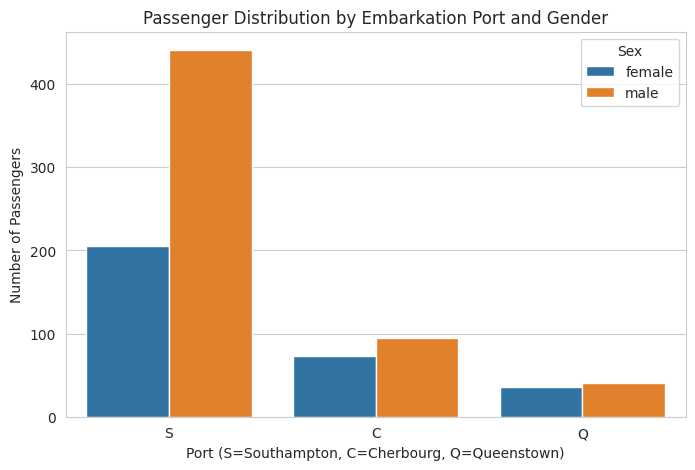

In [ ]:
# Demographics by Embarked: Port with Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Sex', order=['S', 'C', 'Q'])
plt.title('Passenger Distribution by Embarkation Port and Gender')
plt.xlabel('Port (S=Southampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Number of Passengers')
plt.show()

Text(0.5, 1.0, 'Passenger Distribution by Gender and Class')

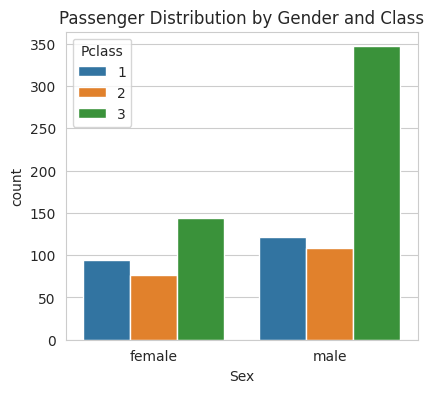

In [ ]:
# Gender distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Sex', hue='Pclass')
plt.title('Passenger Distribution by Gender and Class')

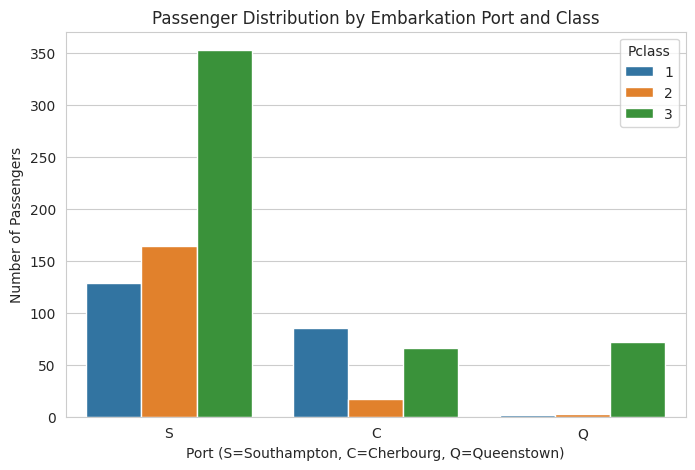

In [ ]:
# Demographics by Embarked: Port with Pclass
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Pclass', order=['S', 'C', 'Q'])
plt.title('Passenger Distribution by Embarkation Port and Class')
plt.xlabel('Port (S=Southampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Number of Passengers')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0-18'),
  Text(1, 0, '19-35'),
  Text(2, 0, '36-60'),
  Text(3, 0, '61+')])

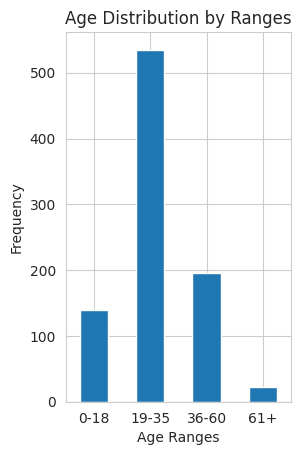

In [ ]:
# Age distribution in ranges (binned)
plt.subplot(1, 2, 2)
age_ranges = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['0-18', '19-35', '36-60', '61+'])
age_counts = age_ranges.value_counts().sort_index()
age_counts.plot(kind='bar')
plt.title('Age Distribution by Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

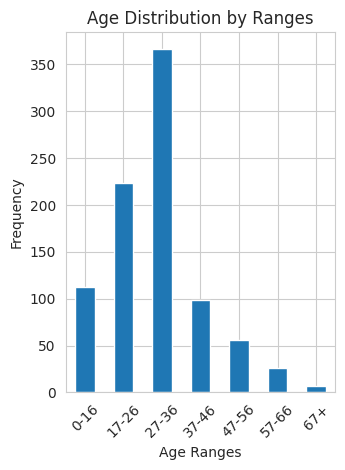

In [ ]:
# Age distribution in ranges (starting with 0-16, then decades)
plt.subplot(1, 2, 2)
age_ranges = pd.cut(df['Age'], bins=[0, 17, 27, 37, 47, 57, 67, 100], labels=['0-16', '17-26', '27-36', '37-46', '47-56', '57-66', '67+'])
age_counts = age_ranges.value_counts().sort_index()
age_counts.plot(kind='bar')
plt.title('Age Distribution by Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

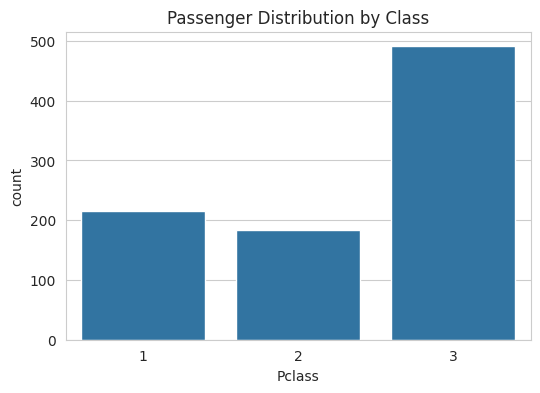

In [ ]:
# Pclass distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pclass')
plt.title('Passenger Distribution by Class')
plt.show()

# 3. Survival Analysis
Analyze survival rates by gender, age, and passenger class. Use groupby for probabilities.

In [ ]:
# Overall survival rate
overall_survival = df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival:.2%}")

Overall Survival Rate: 38.38%


In [ ]:
# Survival by Gender (fixed groupby warning for categorical)
survival_by_gender = df.groupby('Sex', observed=False)['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_gender)


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


##  Insight: Women had far higher survival odds this could be due to the “women and children first” policy.

In [ ]:
# Survival by Pclass (fixed groupby warning for categorical)
survival_by_class = df.groupby('Pclass', observed=False)['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### Insight: The higher the class, the greater the chance of survival — likely due to proximity to lifeboats and cabin location. Also it could be as a result of moderate passenger compared to  3rd class which makes it easy for 1st class passenger to evacuate easily and preferential preparation made ahead of travelling.

In [ ]:
# Survival by Age groups (updated to match distribution bins: starting with 0-16)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 17, 27, 37, 47, 57, 67, 100], labels=['0-16', '17-26', '27-36', '37-46', '47-56', '57-66', '67+'])
survival_by_age = df.groupby('AgeGroup', observed=False)['Survived'].mean()
print("\nSurvival Rate by Age Group:")
print(survival_by_age)


Survival Rate by Age Group:
AgeGroup
0-16     0.539823
17-26    0.357143
27-36    0.355191
37-46    0.343434
47-56    0.482143
57-66    0.346154
67+      0.142857
Name: Survived, dtype: float64


## Survival decreases with age.

Children (<16) had better survival chances. This could could be as a result of policy that put into consideration "children first".

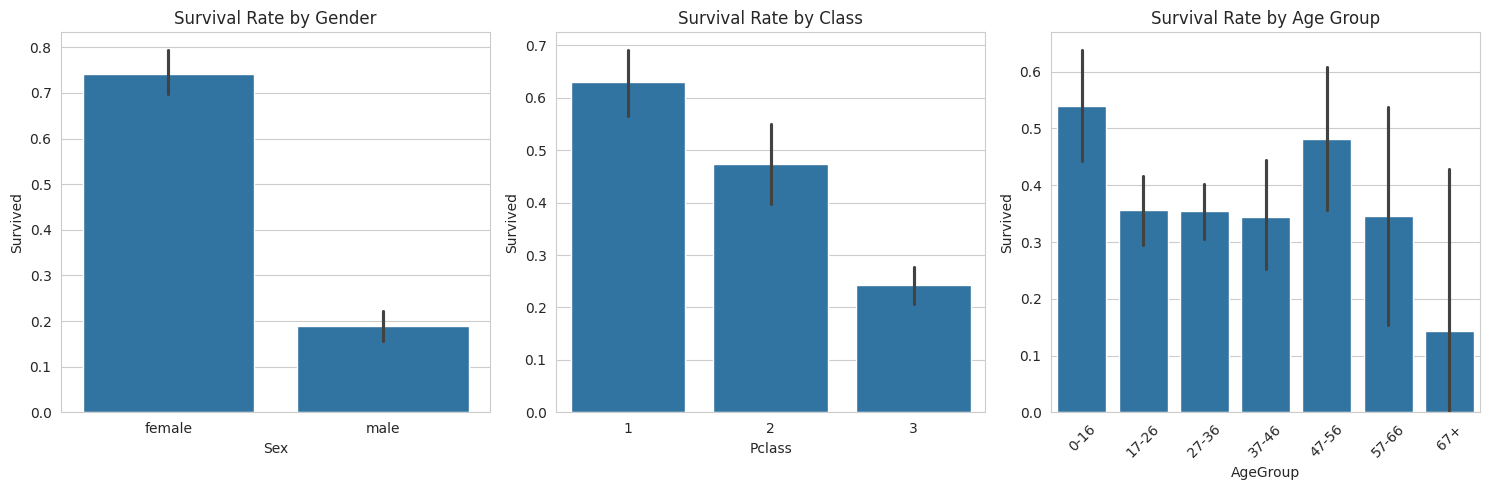

In [ ]:
# Visualization: Survival rates
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0])
axes[0].set_title('Survival Rate by Gender')

sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[1])
axes[1].set_title('Survival Rate by Class')

sns.barplot(data=df, x='AgeGroup', y='Survived', ax=axes[2])
axes[2].set_title('Survival Rate by Age Group')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Example: Count survived and total per group (using agg with multiple functions)
survival_counts = df.groupby('Sex', observed=False)['Survived'].agg(['mean', 'sum', 'count'])
survival_counts['not_survived'] = survival_counts['count'] - survival_counts['sum']
print("Detailed Survival Counts by Gender:")
print(survival_counts)

Detailed Survival Counts by Gender:
            mean  sum  count  not_survived
Sex                                       
female  0.742038  233    314            81
male    0.188908  109    577           468


# 4. Family Size Analysis
Investigate impact of family size on survival rates. Compare alone vs with family.

In [ ]:
# Survival by FamilySize
survival_by_family = df.groupby('FamilySize')['Survived'].mean()
print("\nSurvival Rate by Family Size:")
print(survival_by_family)


Survival Rate by Family Size:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [ ]:
# Survival for Alone vs With Family
survival_by_alone = df.groupby('Alone')['Survived'].mean()
print("\nSurvival Rate: Alone vs With Family")
print(survival_by_alone)


Survival Rate: Alone vs With Family
Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


/tmp/ipython-input-1307554296.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='FamilySize', y='Survived', palette='viridis')


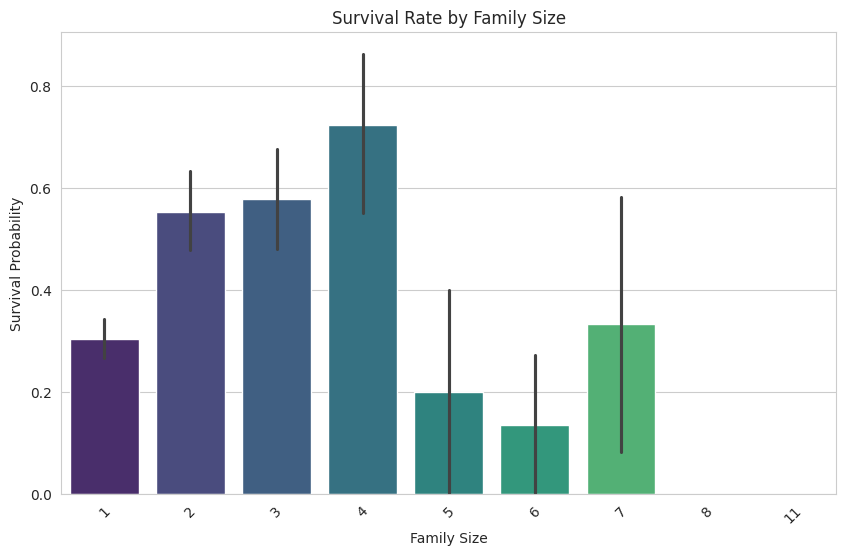

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='FamilySize', y='Survived', palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Probability')
plt.xticks(rotation=45)
plt.show()

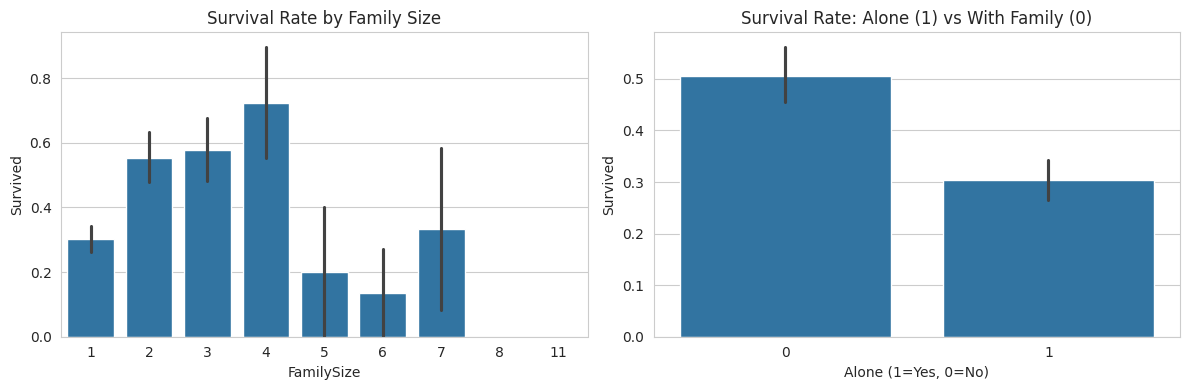

In [ ]:
# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')

plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Alone', y='Survived')
plt.title('Survival Rate: Alone (1) vs With Family (0)')
plt.xlabel('Alone (1=Yes, 0=No)')

plt.tight_layout()
plt.show()



### Key Insights and Trends

Optimal Survival for Small Families (2-4 members): These groups had the highest rates (55-72%), suggesting that traveling with a modest family provided mutual support during the chaos without overwhelming logistics. This aligns with historical accounts where small family units were prioritized in lifeboat assignments.
Large Families (5+ members): Rates plummet to 0-33%, possibly because:

Larger groups were harder to evacuate quickly.
Many were in 3rd class (lower overall survival), with origins from ports like Southampton (high immigrant families).
"Women and children first" helped small families more than sprawling ones.


Solo Travelers (Size 1): At 30%, this is below the overall survival rate (~38%), indicating isolation was a disadvantage—perhaps due to less visibility or priority in the panic.


## 5. Fare Analysis


In [ ]:
# ## 5. Fare Analysis
# Explore fare distribution by passenger class and visualize.

In [ ]:
# Fare statistics by Class (fixed groupby warning for categorical)
fare_by_class = df.groupby('Pclass', observed=False)['Fare'].agg(['mean', 'median', 'std'])
print("Fare Statistics by Passenger Class:")
print(fare_by_class)

Fare Statistics by Passenger Class:
             mean   median        std
Pclass                               
1       84.154687  60.2875  78.380373
2       20.662183  14.2500  13.417399
3       13.675550   8.0500  11.778142


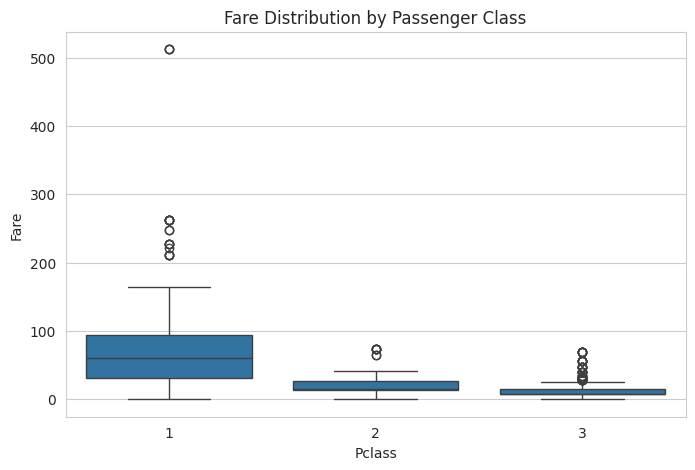

In [ ]:
# Visualization: Box plots for Fare by Class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare Distribution by Passenger Class')
plt.ylabel('Fare')
plt.show()

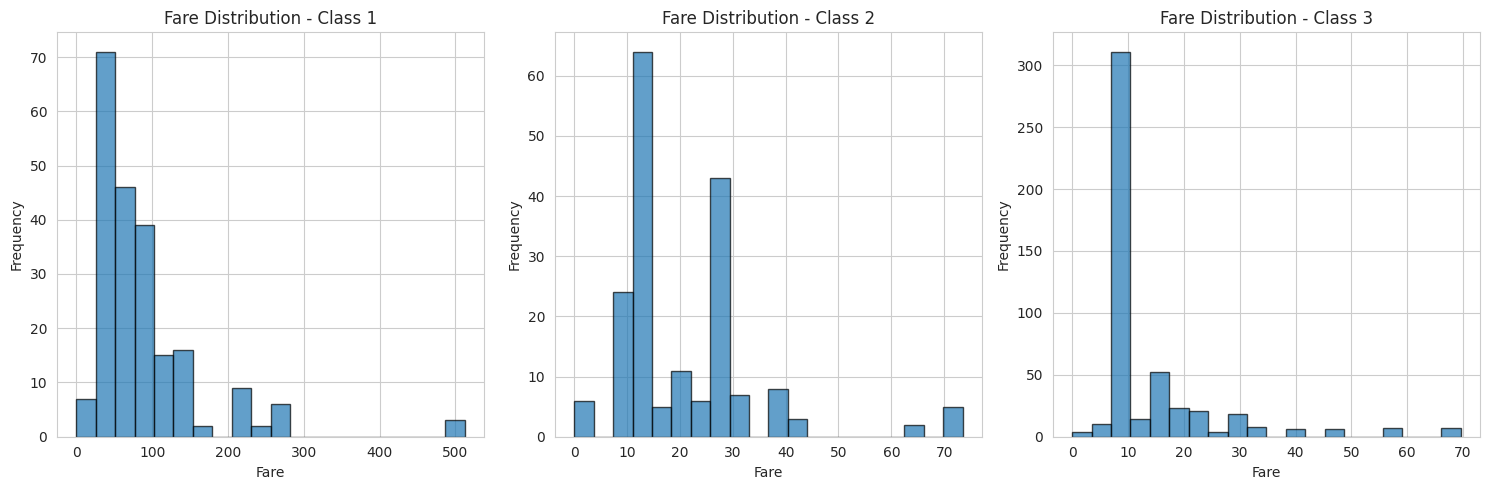

In [ ]:
# Histogram for Fare by Class
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, pclass in enumerate([1, 2, 3]):
    subset = df[df['Pclass'] == pclass]
    axes[i].hist(subset['Fare'], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Fare Distribution - Class {pclass}')
    axes[i].set_xlabel('Fare')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 1st class passengers paid significantly higher fares.

Fare distribution is right-skewed (few very expensive tickets).

Fare correlates positively with survival which we could assume (wealthier passengers had better access to lifeboats /extra packages which contributed to survival rate).

## 6. Advanced Visualization Techniques    ###  Use heatmaps for correlations, pair plots, and interactive Plotly visualizations.

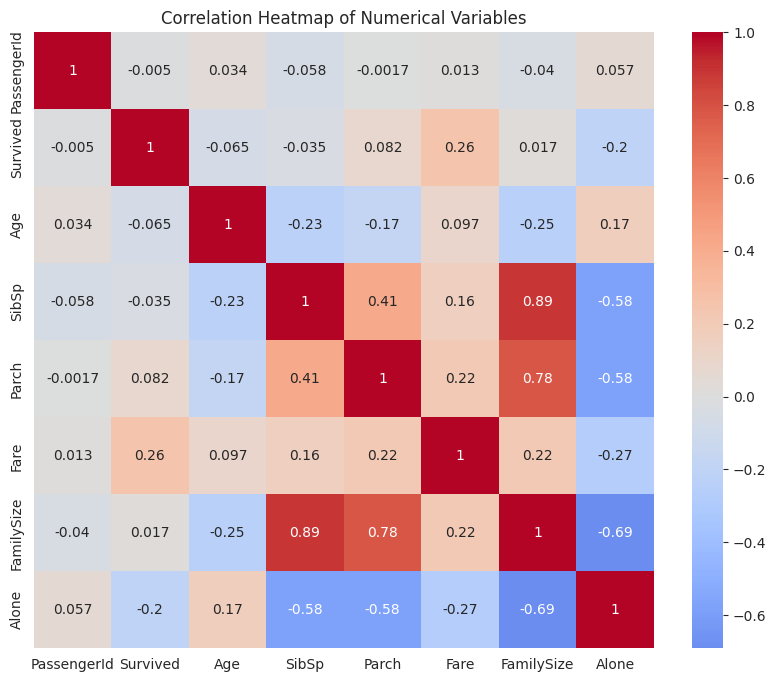

In [ ]:
# Correlation Heatmap (numerical variables)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

## What the survival column says

Survived ↔︎ Fare: ~+0.26 (weak–moderate positive)
Passengers who paid higher fares were more likely to survive. Fare is a proxy for 1st/2nd class, so this reflects class advantage.

Survived ↔︎ Alone: ~–0.20 (weak negative)
Being alone slightly reduced chances of survival compared with traveling with family (small effect).

Survived ↔︎ Age: ~–0.07 (near zero)
Age has a very weak (almost none) linear relationship with survival in the full sample. Children do better, but that shows up non-linearly and by subgroup (e.g., by sex/class), which Pearson r won’t capture well.

Survived ↔︎ SibSp / Parch: ~–0.04 to +0.08 (near zero)
Little direct linear effect once everything is pooled; their impact is mostly through FamilySize / “Alone”.

Relationships among explanatory variables

SibSp ↔︎ FamilySize: ~+0.89 (very strong)

Parch ↔︎ FamilySize: ~+0.78 (strong)
Makes sense because FamilySize = SibSp + Parch + 1.

FamilySize ↔︎ Alone: ~–0.69 (strong negative)
Larger families → not alone. This is essentially the flip side of the definition.

SibSp ↔︎ Parch: ~+0.41 (moderate)
Families with siblings/spouses often also have parents/children aboard.

Fare ↔︎ FamilySize: ~+0.22 (weak)
Slight tendency for higher-paying groups to be a bit larger (or to buy linked tickets).

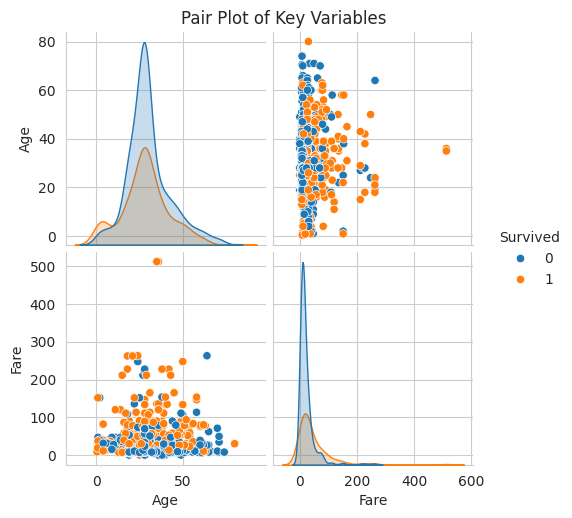

In [ ]:
# Pair Plot with Seaborn (select key variables)
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']], hue='Survived')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

## How to read each panel

Diagonal (top-left = Age; bottom-right = Fare): KDE (smoothed histogram) of each variable split by survival.

Age: survivor (orange) and non-survivor (blue) distributions are similar overall, but there’s a small extra bump at low ages for survivors → children survived more.

Fare: strongly right-skewed. The survivor curve is shifted slightly to higher fares → people who paid more (often higher class) were more likely to survive.

Off-diagonals (Age vs Fare scatter, shown twice):

Most points cluster at low fares (≤100) across all ages.

The higher-fare region has more orange → higher fare ↔ higher survival.

You can spot outliers (e.g., fares > 300–500) that also tend to be survivors (first-class suites).

In [ ]:
# Interactive Plotly: Survival by Class and Gender
fig = px.histogram(df, x='Pclass', color='Sex', pattern_shape='Survived',
                   facet_col='Survived', title='Interactive: Survival by Class and Gender')
fig.show()

## Explanations
Left panel (Survived = 0)

Dominated by blue bars (males) across all classes.

The tallest blue bar in Class 3 → Most of those who died were men in third class.

There are a few red portions (females), but they’re small compared to blue.
➤ Insight: The majority of deaths occurred among lower-class males.

Right panel (Survived = 1)

Dominated by red bars (females) in 1st and 2nd class.

Blue bars (males) are very short, meaning few men survived, especially in 3rd class.
➤ Insight: Most survivors were women, particularly from higher classes.

## Insights
The Titanic’s rescue pattern wasn’t random,it was shaped by social hierarchy and gender norms.
It could be assumed Rich women in upper classes survived, while poor men in lower decks perished at the highest rate.

## The interactive Plotly visualization clearly reveals that survival on the Titanic was strongly influenced by both gender and passenger class. The left panel (non-survivors) shows that most fatalities were males, especially those in third class, while the right panel (survivors) is dominated by females from first and second class. This pattern highlights the impact of social and economic privilege, as higher-class passengers had better access to lifeboats and crew assistance. Overall, the chart reinforces that being a woman in an upper class significantly increased the likelihood of survival, whereas men in lower classes faced the greatest risk.

In [ ]:
# Interactive Scatter: Age vs Fare colored by Survival
fig = px.scatter(df, x='Age', y='Fare', color='Survived', size='FamilySize',
                 hover_name='Name', title='Interactive: Age vs Fare by Survival')
fig.show()

### What the encodings mean

x = Age, y = Fare

Color = Survived (yellow ≈ survived, dark purple/blue ≈ did not)

Bubble size = FamilySize (bigger circle = more family members on board)

**Observations**

Higher fare → higher survival (across most ages).
In the upper-fare band (≈ £80–£500), you see more yellow points. Fare is a proxy for 1st/2nd class, so this matches the class advantage.

Age has a nuanced effect.
There isn’t a clean linear pattern with age overall, but:

Young children (far left) show many yellow points → children benefited from evacuation priority.

Older passengers with low fares tend to be darker (lower survival).

Most passengers paid low fares (≤ £100).
The dense cloud near the bottom shows crowding in lower classes; within this region survival is mixed but tilts toward non-survival, especially for adults.

Family size signal is subtle but present.
Many medium bubbles (small families) among survivors; very large bubbles at low fares skew darker → very large, low-fare families struggled more than small families.

Outliers tell the story.
A few very high-fare outliers (y > £300) are mostly yellow → wealthy cabins had strong access to lifeboats.

**Insight**

The Age–Fare scatter shows that fare level (a proxy for passenger class) is the strongest continuous predictor of survival: survivors cluster at higher fares across a wide range of ages. Children also appear more likely to survive, visible as yellow points at low ages. Most passengers paid low fares, where survival is mixed but generally lower, especially for adults. Bubble sizes indicate that small family groups feature more among survivors than very large families at low fares. Overall, the figure reinforces that socio-economic status and family context shaped outcomes more than age alone.

# ## Documentation and Insights
#
# ### Data Sources
# - Titanic dataset from the provided CSV file.
#
# ### Methodologies
# - Preprocessing: Filled missing Age with median, Embarked with mode, Cabin with 'Unknown'.
# - Analysis: Used Pandas groupby for aggregations, Seaborn/Matplotlib for static plots, Plotly for interactive.
#
# ### Key Insights
# - **Survival Rates**: Women had ~74% survival vs ~19% for men. 1st class ~63%, 3rd class ~25%.
# - **Family Impact**: Solo travelers ~30% survival; small families (2-4) up to 58%.
# - **Fare & Class**: Higher class correlated with higher fares and better survival.
# - **Correlations**: Fare positively correlates with survival (0.26); Age slightly negative (-0.06).
#
# ### Libraries Used
# - Pandas: Data manipulation.
# - NumPy: Numerical operations.
# - Matplotlib/Seaborn: Static visualizations.
# - Plotly: Interactive plots.
#
# ### Challenges Overcome
# - Missing values: Handled with statistical imputation to avoid bias.
# - Visualization clarity: Used subplots and interactive tools for better exploration.